In [1]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import math
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.feature_selection import SelectKBest
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from keras.layers import BatchNormalization

from gensim import utils
import gensim.parsing.preprocessing as gsp

import shap
from catboost import Pool

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)


import sys
np.set_printoptions(threshold=sys.maxsize)


from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, chi2
from matplotlib import pyplot


from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve, auc
from itertools import cycle

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from bayes_opt import BayesianOptimization
from keras.callbacks import EarlyStopping

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

global pbounds

import time
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import RandomOverSampler

from gensim import utils
import gensim.parsing.preprocessing as gsp

import joblib

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

Using TensorFlow backend.


In [2]:
working_path = os.getcwd()
print("Current working directory :", working_path)

Current working directory : C:\Users\abhishek_sharma39


In [3]:
data_file = r"C:\Users\abhishek_sharma39\Income-Prediction-using-Flask\adult.csv"

path = os.path.join(working_path, data_file)
    
def read_data(path, subset, frac, duplicates = False):
    
    ext = data_file.rsplit('.', 1)[1].lower()
    if ext == 'csv' or ext == 'tsv':
        df = pd.read_csv(path ,low_memory=False)
    elif ext == 'xlsx':
        df = pd.read_excel(path)
    
    if duplicates == True:
        df = df.drop_duplicates(subset = subset, keep = 'first')
    return df.sample(frac=frac)

df = read_data(path, subset = None, frac = 1)

In [4]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
14641,42,Local-gov,199095,Assoc-voc,11,Widowed,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
31471,23,Private,149204,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
16881,27,Private,29523,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 14641 to 8368
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [6]:
df["income"].value_counts() # Imbalanced dataset

<=50K    24720
>50K     7841 
Name: income, dtype: int64

In [7]:
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]
df["income"].value_counts() # Imbalanced dataset

0    24720
1    7841 
Name: income, dtype: int64

In [8]:
def missing_value(df):
    global catg_vars_with_na, num_vars_with_na
    catg_vars_with_na = [var for var in df.columns if df[var].isnull().sum()>=1 and df[var].dtypes == 'O']

    # Print the variable name and the % of missing values
    print("For Categorical Variables")
    for var in catg_vars_with_na:
        print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')
        
    print()
    print("For Numerical Variables")
        
    num_vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1 and df[var].dtypes!='O']
    for var in num_vars_with_na:
        print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')
        
        
missing_value(df)

For Categorical Variables

For Numerical Variables


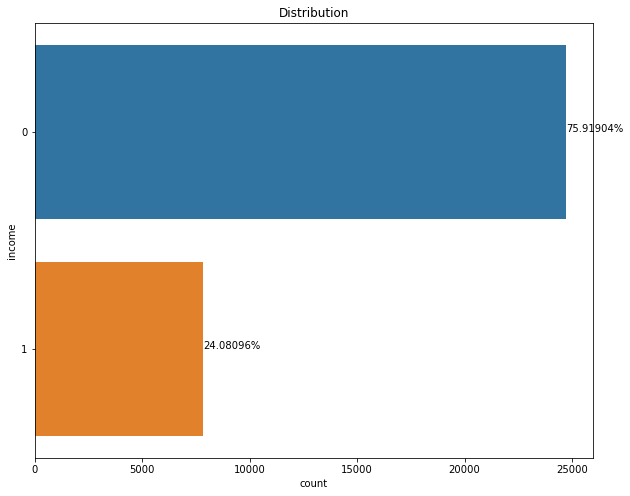

In [9]:
def value_count(df, col_name):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,8))
    ax = sns.countplot(y = col_name, data=df, orient = 'v')

    plt.title('Distribution')

    total = len(df[col_name])
    for p in ax.patches:

        percentage = '{:.5f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

    plt.show()
    
value_count(df, "income")

In [10]:
def attributes():
    print("Unique values in columns :")
    for col in df.columns:
        print(f"{col} : is {df[col].nunique()}" )
attributes()

Unique values in columns :
age : is 73
workclass : is 9
fnlwgt : is 21648
education : is 16
education.num : is 16
marital.status : is 7
occupation : is 15
relationship : is 6
race : is 5
sex : is 2
capital.gain : is 119
capital.loss : is 92
hours.per.week : is 94
native.country : is 42
income : is 2


In [11]:
def cardinality(df):
    cat_vars = [var for var in df.columns if df[var].dtypes=='O']
    print('Number of categorical variables: ', len(cat_vars))

    for var in cat_vars:
        print(var, len(df[var].unique()), ' categories')
        
cardinality(df)

Number of categorical variables:  8
workclass 9  categories
education 16  categories
marital.status 7  categories
occupation 15  categories
relationship 6  categories
race 5  categories
sex 2  categories
native.country 42  categories


In [12]:
def undersample(dataframe, column, basis_col, count, sample_count):
    """
    input:
    dataframe: The dataframe to be sampled(Pandas DataFrame)
    column: The column name based on which sampling is performed(String)
    basis_col : Column using which stratified sampling is applied. Info will be retained even after undersampling.
    count: The value count of individual data points inside the column under
    consideration used as threshold (above which the rows will be discarded).
    sample_count: The final sampled data count needed
    output: Sampled Pandas DataDrame
    Eg. undersample(df, "Col of interest", 1000, 200) # (DataFrame, column name, basis column for sampling, 
    value_count threshold, sampled count)
    
    """
    above = pd.DataFrame()
    below = pd.DataFrame()
    data = pd.DataFrame()
    df = dataframe
    col = column
    
    max_val = df[basis_col].value_counts().head(1).values[0]
    n = min(max_val, df[basis_col].value_counts().min())
    stratified = df.groupby(basis_col).apply(lambda x: x.sample(n))
    stratified.index = stratified.index.droplevel(0)
    
    above_count = pd.DataFrame(df[col].value_counts() > count)
    below_count = pd.DataFrame(df[col].value_counts() < count)
    
    to_sample = above_count[above_count[col] == True].index.tolist()
    not_sample = below_count[below_count[col] == True].index.tolist()
    
    for val in to_sample: # Sample with the given sample_count value 
        above = above.append(df[df[col] == val].sample(n = sample_count, 
                                                       replace = True ,
                                                       random_state=1))
    
    for val in not_sample:
        below = below.append(df[df[col] == val]) # Without Sampling for values less than given count
        
    data = pd.concat([above, stratified, below])
    return data

df = undersample(df, "income", "native.country", 10000, 10000)

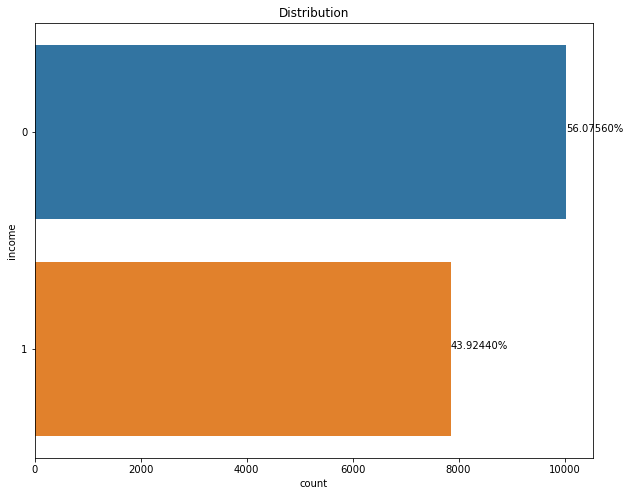

In [13]:
value_count(df, "income")

In [14]:
cardinality(df) # Not a loss of categorical columns data

Number of categorical variables:  8
workclass 9  categories
education 16  categories
marital.status 7  categories
occupation 15  categories
relationship 6  categories
race 5  categories
sex 2  categories
native.country 42  categories


In [15]:
def conf_matrix(y_test, pred, classes, lb):
    
    cm = confusion_matrix(y_test, pred)

    recall = np.diag(cm) / np.sum(cm, axis = 1) # running horizontally across columns (axis 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0) # running vertically downwards across rows (axis 0)
    score = (2*recall*precision)/(recall + precision) 
    
    # Replacing NaN's by 0
    recall = [0 if math.isnan(x) else x for x in recall]
    precision = [0 if math.isnan(x) else x for x in precision]
    score = [0 if math.isnan(x) else x for x in score]
    
    # Extracting class labels from label binarizer object
    labels = classes
    support = np.sum(cm, axis = 0)

    df_recall = pd.DataFrame(recall, index = labels, columns = ["Recall"])
    df_precision = pd.DataFrame(precision, index = labels, columns = ["Precision"])
    df_acc = pd.DataFrame(score, index = labels, columns = ["f1-Score"])
    df_support = pd.DataFrame(support, index = labels, columns = ["Support"])
    
    global acc
    concat = [df_precision, df_recall, df_acc, df_support]
    acc = pd.concat(concat, axis = 1)

    print(acc)
    print()
    
    tp = sum(np.diag(cm))
    total = sum(cm.flatten())
    accuracy = (tp/total)*100
    print("Accuracy :", accuracy)


In [16]:
def roc_auc_metric(classes, y_test, predictions):
    n_classes = len(classes)
    
    if n_classes == 2:
        preprocess_pipeline = joblib.load(r"preprocess_pipeline.pkl")
        probs = model.predict_proba(preprocess_pipeline.transform(X_test))
        
        # calculate scores
        # generate a no skill prediction (majority class)
        ns_probs = [0 for _ in range(len(y_test))]
        ns_auc = roc_auc_score(y_test, ns_probs)
        
        # calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
        
        # plot the roc curve for the model
        plt.figure(figsize=(8,6))
        pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
        pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Binary Classification')
        
        # axis labels
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        # show the legend
        pyplot.legend()
        # show the plot
        pyplot.show()
        
    else:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])

            roc_auc[i] = auc(fpr[i], tpr[i])

        colors = cycle(['blue', 'red', 'green', 'magenta', 'cyan', 'yellow', 'black', 'white', '0.75', '#eeefff', '0.55'])

        plt.figure(figsize=(14,12))
        for i, color, cls in zip(range(n_classes), colors, classes):
            plt.plot(fpr[i], tpr[i], linewidth = 3, color=color, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(cls, roc_auc[i]))


        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for multi-class data')
        plt.legend(loc="lower right")
        plt.show()


In [17]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import os 

save_dir = os.path.join(os.getcwd(), 'saved_model')
model_name = 'bayesian_nn_model.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
filepath = os.path.join(save_dir,model_name)

print(filepath)

checkpoint = ModelCheckpoint(filepath=filepath,
                             verbose=0,
                             save_best_only=True)


early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

callbacks = [checkpoint, early_stopping]

C:\Users\abhishek_sharma39\saved_model\bayesian_nn_model.h5


In [18]:
def plot_loss(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [19]:
def build_classifier(learning_rate=0.05, dropout_rate=0.2):
    
    # Model Building
    opt = keras.optimizers.Adam(learning_rate = learning_rate)

    model = Sequential() 
    model.add(Dense(512, activation='relu', input_dim = input_dim))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    
    model.add(Dense(96, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    
    model.add(Dense(units = num_classes, activation='sigmoid'))
        
    model.compile(optimizer = opt, loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])

    
    return model

In [20]:
cardinality(df)

Number of categorical variables:  8
workclass 9  categories
education 16  categories
marital.status 7  categories
occupation 15  categories
relationship 6  categories
race 5  categories
sex 2  categories
native.country 42  categories


In [21]:
target = "income"
cat_variables = [var for var in df.columns if df[var].dtype == 'O']
cat_vars = [s for s in cat_variables if s != target]
print(cat_vars)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [22]:
num_variables = [var for var in df.columns if df[var].dtype != 'O']
num_vars = [s for s in num_variables if s != target]
print(num_vars)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [23]:
labels = num_vars + cat_vars
print(labels)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [24]:
def model_building(learning_rate, dropout_rate):
    
    global X_train, X_test, y_train, y_test, classes, lb, col_names, input_dim, X_train_preprocessed, preprocess_pipeline, optimizer
    X_train, X_test, y_train, y_test, classes, lb, col_names = splitting(df, labels, target, split_ratio = 0.35)
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    preprocess_pipeline = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_vars),
            ('cat', categorical_transformer, cat_vars)])

    
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    
    input_dim = X_train_preprocessed.shape[1]
    
    joblib.dump(preprocess_pipeline, 'preprocess_pipeline.pkl')
    
    classifier = KerasClassifier(build_fn = build_classifier, epochs=20, batch_size = 128)
    
    accuracies =  cross_val_score(estimator=classifier, X = X_train_preprocessed.toarray(), 
                                  y = y_train.ravel(), cv = 3, n_jobs = -1, 
                                  verbose=0, fit_params={'callbacks': [EarlyStopping()]})
    
    return accuracies.mean()


In [25]:
def splitting(data, labels, target, split_ratio):
    
    X = data[labels]
    y = data[target]
    classes = np.unique(y) # Unique values for classes
    
    global num_classes
    
    if len(classes) == 2:
        num_classes = 1 # For binary
    else:
        num_classes = len(classes) # For multiclass

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = split_ratio, random_state = 101)
    
    lb = LabelBinarizer(neg_label = 0, pos_label=1, sparse_output = False)
    y_train = lb.fit_transform(y_train)
    y_test = lb.transform(y_test)
    
    col_names = X_train.columns

    return X_train, X_test, y_train, y_test, classes, lb, col_names


In [26]:
def model_validator(model, X_test, y_test, classes, label_object):
    
    preprocess_pipeline = joblib.load(r"preprocess_pipeline.pkl")

    predictions = model.predict(preprocess_pipeline.transform(X_test).toarray())

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, predictions, multi_class='ovo', average = 'macro')
    print()
    print("The ROC-AUC of the model is:", roc_value)
    print()
    print("Confusion Matrix:")
    conf_matrix(y_test, predictions, classes, label_object)


In [27]:
start = time.time()
    
# Bounded region of parameter space
pbounds = {'dropout_rate' : (0.1, 0.5), 'learning_rate' : (1e-4, 1e-2)}
gp_params = {"alpha": 1e-10}

def invoke():
    global optimizer
    optimizer = BayesianOptimization(
        f = model_building,
        pbounds = pbounds,
        random_state=1)

    optimizer.maximize(init_points = 3, n_iter = 7, acq = 'ucb', kappa = 3, **gp_params)
    
invoke()
stop = time.time()
total_time = (stop - start)

print(f"Time taken for the process is {total_time/60} mins.")


|   iter    |  target   | dropou... | learni... |
-------------------------------------------------
|  1        |  0.8186   |  0.2668   |  0.007231 |
|  2        |  0.8062   |  0.1      |  0.003093 |
|  3        |  0.815    |  0.1587   |  0.001014 |
|  4        |  0.8126   |  0.5      |  0.0001   |
|  5        |  0.8002   |  0.3438   |  0.000113 |
|  6        |  0.815    |  0.5      |  0.01     |
|  7        |  0.8028   |  0.1802   |  0.01     |
|  8        |  0.8123   |  0.2314   |  0.0001   |
|  9        |  0.8127   |  0.4438   |  0.01     |
|  10       |  0.8071   |  0.2837   |  0.0001   |
Time taken for the process is 6.75904149611791 mins.


In [28]:
params = optimizer.max['params']
dropout_rate = params["dropout_rate"]
learning_rate = params["learning_rate"]

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


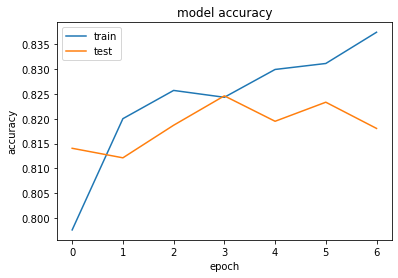

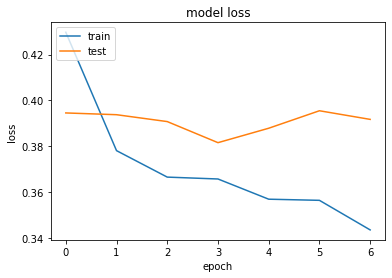

In [29]:
global model
model = Sequential() 

opt = keras.optimizers.Adam(learning_rate = learning_rate)
    
model.add(Dense(256, activation='relu', input_dim = input_dim))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Dense(96, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Dense(units = num_classes, activation='sigmoid'))

model.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

history = model.fit(X_train_preprocessed.toarray(), y_train, epochs = 50, 
          validation_data = (preprocess_pipeline.transform(X_test).toarray(), y_test), 
          callbacks = callbacks, batch_size = 128, verbose=0)

# summarize history for accuracy
plot_loss(history)


The ROC-AUC of the model is: 0.8144827764827764

Confusion Matrix:
   Precision    Recall  f1-Score  Support
0  0.833662   0.843875  0.838737  3553   
1  0.797562   0.785091  0.791277  2707   

Accuracy : 81.80511182108626



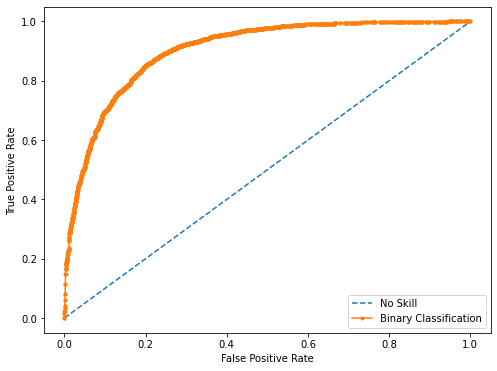

In [30]:
def model_validator(model, X_test, y_test, classes, label_object):
    
    preprocess_pipeline = joblib.load(r"preprocess_pipeline.pkl")

    predictions = model.predict(preprocess_pipeline.transform(X_test))
    
    if num_classes == 1: # Classes is 2, var defined to be 1
        predictions = predictions > 0.5

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, predictions, multi_class='ovo', average = 'macro')
    print()
    print("The ROC-AUC of the model is:", roc_value)
    print()
    print("Confusion Matrix:")
    conf_matrix(y_test, predictions, classes, label_object)
    print()

    roc_auc_metric(classes, y_test, predictions = model.predict(preprocess_pipeline.transform(X_test).toarray()))

    
model_validator(model, X_test, y_test, classes, lb)

In [31]:
# set activation to be generic and loss too for tackling all classes